In [86]:
import ROOT
from ROOT import TCanvas, TH1D, TCanvas


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab

In [50]:
Grades = pd.read_csv("grades.csv")

In [51]:
print("Keys of Features: \n{}".format(Grades.keys()))

Keys of Features: 
Index(['Alumno', 'ID', 'Parcial1'], dtype='object')


In [54]:
df = pd.DataFrame(Grades)
#print(df)


In [100]:
Alumno_ = Grades.Alumno
ID_ = Grades.ID
Parcial1 = Grades.Parcial1
print(Parcial1)

0     4.6
1     2.1
2     2.8
3     0.0
4     2.5
5     2.1
6     3.5
7     2.0
8     0.0
9     4.2
10    2.1
11    5.0
12    3.9
13    2.2
14    4.2
15    2.1
16    1.0
17    1.8
18    1.5
19    2.5
20    5.0
21    2.9
22    2.9
23    1.5
24    2.6
25    2.9
26    3.4
27    4.1
28    1.5
Name: Parcial1, dtype: float64


In [71]:
(mu, sigma) = norm.fit(Grades.Parcial1)

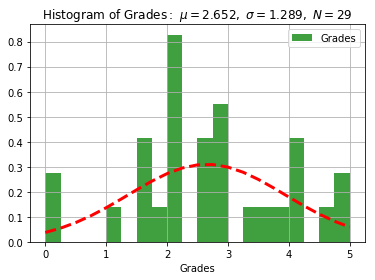

In [107]:
n, bins, patches = plt.hist(Grades.Parcial1, 20, normed = 1, facecolor='green', alpha=0.75, label='Grades')

y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=3)

N=29.

plt.legend()
plt.xlabel('Grades')
plt.ylabel('')
plt.title(r'$\mathrm{Histogram\ of\ Grades:}\ \mu=%.3f,\ \sigma=%.3f, \ N=%.0f$' %(mu, sigma, N))
plt.grid(True)


plt.savefig("HistoGrades.pdf")
plt.show()


In [117]:
%jsroot on
c1 = TCanvas( 'c1', 'Histo', 200, 10, 700, 500 )
h1 = TH1D( 'h1', 'Grades Histo', 20, 0., 5.2 )

length = len(Parcial1)
for i in range(length):
    h1.Fill(Parcial1[i])

h1.SetFillColor(4)
h1.SetLineColor(1)

scale = h1.Integral()
print(scale)
h1.Scale(1.0/scale)

h1.Draw('HIST')

c1.Update()
c1.SaveAs("HistoFromROOT.pdf")

29.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file HistoFromROOT.pdf has been created
